In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
##質問すること　label_encodingとone_hot_encodingについて


ここはデータを軽く観察しただけなので関係ないです

In [2]:
train_data1=pd.read_csv('01.csv')
train_data1.head(3)

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1047870,中古マンション等,NaN,1105,北海道,札幌市豊平区,月寒東５条,南郷１３丁目,13,３ＬＤＫ,...,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2017年第1四半期,未改装,NaN,7.079181
1,1025658,中古マンション等,NaN,1102,北海道,札幌市北区,新琴似５条,麻生,13,４ＬＤＫ,...,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2008年第2四半期,未改装,NaN,7.255273
2,1005115,中古マンション等,NaN,1101,北海道,札幌市中央区,南１条西,西１８丁目,2,２ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2008年第4四半期,未改装,NaN,7.146128


In [3]:
train_data1.shape

(26504, 28)

In [4]:
train_data1.isnull().sum()

ID                  0
種類                  0
地域              26504
市区町村コード             0
都道府県名               0
市区町村名               0
地区名                 0
最寄駅：名称             71
最寄駅：距離（分）        1161
間取り               650
面積（㎡）               0
土地の形状           26504
間口              26504
延床面積（㎡）         26504
建築年               761
建物の構造            1303
用途               4115
今後の利用目的         13187
前面道路：方位         26504
前面道路：種類         26504
前面道路：幅員（ｍ）      26504
都市計画             1324
建ぺい率（％）          1463
容積率（％）           1463
取引時点                0
改装               1784
取引の事情等          25816
取引価格（総額）_log        0
dtype: int64

In [5]:
#file_paths=glob.glob('*.csv')
#train_data=[pd.read_csv(file) for file in file_paths]
#train_data[0].head(10)

In [6]:
train_data4=pd.read_csv('04.csv')
train_data4.head(3)

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,4028282,中古マンション等,NaN,4102,宮城県,仙台市宮城野区,西宮城野,榴ケ岡,8,２ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2014年第1四半期,未改装,NaN,7.041393
1,4014834,中古マンション等,NaN,4101,宮城県,仙台市青葉区,北根黒松,黒松(宮城),6,３ＬＤＫ,...,NaN,NaN,NaN,第２種住居地域,60.0,200.0,2014年第2四半期,未改装,NaN,7.361728
2,4061450,中古マンション等,NaN,4105,宮城県,仙台市泉区,八乙女,八乙女,11,４ＬＤＫ,...,NaN,NaN,NaN,第２種住居地域,60.0,200.0,2016年第4四半期,未改装,NaN,7.518514


In [7]:
train_data4.isnull().sum()

ID                  0
種類                  0
地域              12071
市区町村コード             0
都道府県名               0
市区町村名               0
地区名                 1
最寄駅：名称             15
最寄駅：距離（分）         335
間取り               363
面積（㎡）               0
土地の形状           12071
間口              12071
延床面積（㎡）         12071
建築年               475
建物の構造             412
用途               1020
今後の利用目的          5468
前面道路：方位         12071
前面道路：種類         12071
前面道路：幅員（ｍ）      12071
都市計画              107
建ぺい率（％）           214
容積率（％）            214
取引時点                0
改装                926
取引の事情等          11663
取引価格（総額）_log        0
dtype: int64

In [8]:
train_data4.describe()

,ID,地域,市区町村コード,土地の形状,間口,延床面積（㎡）,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,1.207100e+04,0.0,12071.000000,0.0,0.0,0.0,0.0,0.0,0.0,11857.000000,11857.000000,12071.000000
mean,4.028180e+06,NaN,4104.972910,NaN,NaN,NaN,NaN,NaN,NaN,69.068904,293.443535,7.081937
std,1.946258e+04,NaN,17.117727,NaN,NaN,NaN,NaN,NaN,NaN,10.329918,120.562986,0.338737
min,4.000005e+06,NaN,4101.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,60.000000,4.477121
25%,4.010742e+06,NaN,4101.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,6.886491
50%,4.025734e+06,NaN,4102.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,7.146128
75%,4.042662e+06,NaN,4104.000000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,400.000000,7.322219
max,4.099746e+06,NaN,4404.000000,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,800.000000,8.778151


ここからまず、47都道府県分のデータを読み込んで、順番に並べ替えた後、データを結合して一つのデータフレームにした

In [9]:
pd.options.display.max_columns=30

csv_files=glob.glob('*.csv')

sorted_csv_files=sorted(csv_files)

data_list=[]

for file in sorted_csv_files:
       data_list.append(pd.read_csv(file, dtype={10:'object'}))

df_apartment=pd.concat(data_list,axis=0)

df_apartment.head(10)

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1047870,中古マンション等,NaN,1105,北海道,札幌市豊平区,月寒東５条,南郷１３丁目,13,３ＬＤＫ,85,NaN,NaN,NaN,昭和63年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2017年第1四半期,未改装,NaN,7.079181
1,1025658,中古マンション等,NaN,1102,北海道,札幌市北区,新琴似５条,麻生,13,４ＬＤＫ,100,NaN,NaN,NaN,平成6年,ＲＣ,住宅,NaN,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2008年第2四半期,未改装,NaN,7.255273
2,1005115,中古マンション等,NaN,1101,北海道,札幌市中央区,南１条西,西１８丁目,2,２ＬＤＫ,60,NaN,NaN,NaN,平成13年,ＲＣ,住宅,NaN,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2008年第4四半期,未改装,NaN,7.146128
3,1028669,中古マンション等,NaN,1103,北海道,札幌市東区,北４４条東,栄町(札幌),5,３ＬＤＫ,70,NaN,NaN,NaN,平成6年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2019年第4四半期,改装済,NaN,7.301030
4,1013344,中古マンション等,NaN,1101,北海道,札幌市中央区,南２３条西,西１１丁目,30分?60分,４ＬＤＫ,75,NaN,NaN,NaN,平成2年,ＲＣ,住宅,NaN,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2008年第3四半期,未改装,NaN,7.380211
5,1101062,中古マンション等,NaN,1204,北海道,旭川市,５条通,旭川,23,３ＬＤＫ,110,NaN,NaN,NaN,平成11年,ＲＣ,住宅,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017年第3四半期,未改装,NaN,7.342423
6,1072284,中古マンション等,NaN,1108,北海道,札幌市厚別区,厚別中央４条,厚別,9,２ＬＤＫ,55,NaN,NaN,NaN,平成2年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2017年第2四半期,改装済,NaN,6.995635
7,1049336,中古マンション等,NaN,1106,北海道,札幌市南区,澄川１条,澄川,9,３ＬＤＫ,85,NaN,NaN,NaN,昭和55年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2021年第4四半期,未改装,NaN,7.146128
8,1044133,中古マンション等,NaN,1104,北海道,札幌市白石区,本通,南郷１８丁目,3,４ＬＤＫ,100,NaN,NaN,NaN,平成12年,ＲＣ,住宅,NaN,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2012年第3四半期,未改装,NaN,7.278754
9,1095822,中古マンション等,NaN,1203,北海道,小樽市,朝里川温泉,朝里,30分?60分,２ＬＤＫ,75,NaN,NaN,NaN,平成4年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2017年第1四半期,改装済,NaN,6.690196


欠損値の有無などを確認して、全てが欠損値のような明らかに不要と考えられるカラムを特定してデータフレームから削除する

In [10]:
df_apartment.isnull().sum()
#全て欠損値のデータは、土地の形状11、間口12、延床面積13、前面道路系18,19,20、取引の事情など26

ID                   0
種類                   0
地域              793377
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                675
最寄駅：名称            2813
最寄駅：距離（分）        23239
間取り              30067
面積（㎡）                0
土地の形状           793377
間口              793377
延床面積（㎡）         793377
建築年              23203
建物の構造            23033
用途               89206
今後の利用目的         368668
前面道路：方位         793377
前面道路：種類         793377
前面道路：幅員（ｍ）      793377
都市計画             20872
建ぺい率（％）          25577
容積率（％）           25577
取引時点                 0
改装               78647
取引の事情等          773893
取引価格（総額）_log         0
dtype: int64

In [11]:
columns=df_apartment.columns.unique()
print(columns[10])

面積（㎡）


In [12]:
df_train_apartment=df_apartment.drop(\
                                     df_apartment.columns[[0,1,2,3,11,12,13,18,19,20,26]],axis=1).copy()

df_train_apartment.head(10)

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,北海道,札幌市豊平区,月寒東５条,南郷１３丁目,13,３ＬＤＫ,85,昭和63年,ＲＣ,住宅,住宅,第２種中高層住居専用地域,60.0,200.0,2017年第1四半期,未改装,7.079181
1,北海道,札幌市北区,新琴似５条,麻生,13,４ＬＤＫ,100,平成6年,ＲＣ,住宅,NaN,第１種住居地域,60.0,200.0,2008年第2四半期,未改装,7.255273
2,北海道,札幌市中央区,南１条西,西１８丁目,2,２ＬＤＫ,60,平成13年,ＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2008年第4四半期,未改装,7.146128
3,北海道,札幌市東区,北４４条東,栄町(札幌),5,３ＬＤＫ,70,平成6年,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2019年第4四半期,改装済,7.301030
4,北海道,札幌市中央区,南２３条西,西１１丁目,30分?60分,４ＬＤＫ,75,平成2年,ＲＣ,住宅,NaN,第２種中高層住居専用地域,60.0,200.0,2008年第3四半期,未改装,7.380211
5,北海道,旭川市,５条通,旭川,23,３ＬＤＫ,110,平成11年,ＲＣ,住宅,NaN,NaN,NaN,NaN,2017年第3四半期,未改装,7.342423
6,北海道,札幌市厚別区,厚別中央４条,厚別,9,２ＬＤＫ,55,平成2年,ＲＣ,住宅,住宅,第２種中高層住居専用地域,60.0,200.0,2017年第2四半期,改装済,6.995635
7,北海道,札幌市南区,澄川１条,澄川,9,３ＬＤＫ,85,昭和55年,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,200.0,2021年第4四半期,未改装,7.146128
8,北海道,札幌市白石区,本通,南郷１８丁目,3,４ＬＤＫ,100,平成12年,ＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2012年第3四半期,未改装,7.278754
9,北海道,小樽市,朝里川温泉,朝里,30分?60分,２ＬＤＫ,75,平成4年,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2017年第1四半期,改装済,6.690196


In [13]:
def get_dtype_and_unique_count(df):
    info = []
    for col in df.columns:
        dtype = df[col].dtype
        unique_count = df[col].nunique()
        info.append({'Column': col, 'Data Type': dtype, 'Unique Count': unique_count})
    return pd.DataFrame(info)

get_dtype_and_unique_count(df_train_apartment)
##関数の()には適当にdfなどと入れておいて良い、使うときは結局具体的なデータフレームの名前を突っ込む

,Column,Data Type,Unique Count
0,都道府県名,object,47
1,市区町村名,object,619
2,地区名,object,12254
3,最寄駅：名称,object,3892
4,最寄駅：距離（分）,object,34
5,間取り,object,66
6,面積（㎡）,object,118
7,建築年,object,79
8,建物の構造,object,13
9,用途,object,23


In [14]:
def df_table (df_train_apartment):
    info=[]
    for column in df_train_apartment.columns:
       dtype=df_train_apartment[column].dtype
       unique_count=df_train_apartment[column].nunique()
       info.append({'column':column,'dtype':dtype,'unique':unique_count})
    return pd.DataFrame(info)

df_table(df_train_apartment)

,column,dtype,unique
0,都道府県名,object,47
1,市区町村名,object,619
2,地区名,object,12254
3,最寄駅：名称,object,3892
4,最寄駅：距離（分）,object,34
5,間取り,object,66
6,面積（㎡）,object,118
7,建築年,object,79
8,建物の構造,object,13
9,用途,object,23


In [15]:
df_train_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793377 entries, 0 to 2284
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   都道府県名         793377 non-null  object 
 1   市区町村名         793377 non-null  object 
 2   地区名           792702 non-null  object 
 3   最寄駅：名称        790564 non-null  object 
 4   最寄駅：距離（分）     770138 non-null  object 
 5   間取り           763310 non-null  object 
 6   面積（㎡）         793377 non-null  object 
 7   建築年           770174 non-null  object 
 8   建物の構造         770344 non-null  object 
 9   用途            704171 non-null  object 
 10  今後の利用目的       424709 non-null  object 
 11  都市計画          772505 non-null  object 
 12  建ぺい率（％）       767800 non-null  float64
 13  容積率（％）        767800 non-null  float64
 14  取引時点          793377 non-null  object 
 15  改装            714730 non-null  object 
 16  取引価格（総額）_log  793377 non-null  float64
dtypes: float64(3), object(14)
memory usage: 109.0+ MB


In [16]:
df_train_apartment

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,北海道,札幌市豊平区,月寒東５条,南郷１３丁目,13,３ＬＤＫ,85,昭和63年,ＲＣ,住宅,住宅,第２種中高層住居専用地域,60.0,200.0,2017年第1四半期,未改装,7.079181
1,北海道,札幌市北区,新琴似５条,麻生,13,４ＬＤＫ,100,平成6年,ＲＣ,住宅,NaN,第１種住居地域,60.0,200.0,2008年第2四半期,未改装,7.255273
2,北海道,札幌市中央区,南１条西,西１８丁目,2,２ＬＤＫ,60,平成13年,ＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2008年第4四半期,未改装,7.146128
3,北海道,札幌市東区,北４４条東,栄町(札幌),5,３ＬＤＫ,70,平成6年,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2019年第4四半期,改装済,7.301030
4,北海道,札幌市中央区,南２３条西,西１１丁目,30分?60分,４ＬＤＫ,75,平成2年,ＲＣ,住宅,NaN,第２種中高層住居専用地域,60.0,200.0,2008年第3四半期,未改装,7.380211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,沖縄県,那覇市,天久,おもろまち,22,４ＬＤＫ,100,平成19年,ＲＣ,住宅,住宅,第１種低層住居専用地域,50.0,150.0,2014年第3四半期,未改装,7.681241
2281,沖縄県,那覇市,おもろまち,おもろまち,6,１ＬＤＫ,90,平成25年,ＲＣ,住宅,住宅,近隣商業地域,80.0,400.0,2016年第3四半期,未改装,7.792392
2282,沖縄県,浦添市,宮城,NaN,NaN,２ＬＤＫ,70,平成3年,ＲＣ,NaN,住宅,第１種中高層住居専用地域,60.0,200.0,2020年第4四半期,改装済,7.255273
2283,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,80,平成29年,ＲＣ,NaN,住宅,近隣商業地域,80.0,300.0,2018年第4四半期,改装済,7.612784


In [17]:
df_train_apartment.describe(include='all')
##describe()でデータの統計量を観察する
##describe()でinclude='all'にすることでカテゴリ変数に対しても結果を表示できる

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
count,793377,793377,792702,790564,770138,763310,793377,770174,770344,704171,424709,772505,767800.000000,767800.000000,793377,714730,793377.000000
unique,47,619,12254,3892,34,66,118,79,13,23,4,16,NaN,NaN,69,2,NaN
top,東京都,大田区,本町,川崎,6,３ＬＤＫ,70,平成20年,ＲＣ,住宅,住宅,商業地域,NaN,NaN,2020年第4四半期,未改装,NaN
freq,239745,15787,6573,3125,64207,333203,103750,26971,537669,695658,394123,219043,NaN,NaN,15525,514409,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.737210,303.455626,NaN,NaN,7.236956
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.420672,148.600044,NaN,NaN,0.357088
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,50.000000,NaN,NaN,2.653213
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,NaN,NaN,7.041393
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,NaN,NaN,7.278754
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,400.000000,NaN,NaN,7.477121


In [18]:

##あるデータとあるデータの関連を見るためにグラフを書いて眺める

In [19]:
#df[]の[]の中にTrueかFalseを返してくれるコードを書くことによってTrueの行のみを抽出することができる
non_numeric=df_train_apartment[df_train_apartment['最寄駅：距離（分）'].apply(lambda x:pd.to_numeric(x,errors='coerce')).isna()]

df=pd.DataFrame(non_numeric)
df.dropna(subset='最寄駅：距離（分）',inplace=True)

df['最寄駅：距離（分）'].unique()

array(['30分?60分', '1H?1H30', '2H?', '1H30?2H'], dtype=object)

In [20]:
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('30分?60分',45)
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('1H?1H30',75)
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('2H?',120)
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('1H30?2H',90)


In [21]:


df_train_apartment_1=df_train_apartment.copy()

##一旦、欠損値のあるデータを取り除いた
df_train_apartment_1.dropna(subset=['最寄駅：距離（分）','建築年'],inplace=True)

##駅からの時間と建築年のデータをint型に変更する
df_train_apartment_1['最寄駅：距離（分）']=df_train_apartment_1['最寄駅：距離（分）'].astype(int)
##辞書型のリストに対してデータをとってくるコード

##int()は各要素に対して適用できる、一方でastypeはシリーズ型データやデータフレームに対して適用することができる
##エラーが出ているデータをどのようにするか→データを平均値などに置換する replaceメソッドで置き換える
##あとは欠損値をどのように埋めるかが問題→df_train_aprtment_1では欠損のあるデータは消す
##df_train_apartment_2では欠損値に欠損をとって求めた平均値を代入してみる（ただし、グラフを書いてどのような分布か見てから）

In [22]:
##辞書型のリストに対してデータをとってくるコード
##リストの後の[]にはとってきたい辞書のデータを入れる
def era_year_to_number(era_year):
    era_start={'昭和':1926,'平成':1989,'令和':2019}
    era=era_year[:2]
    year=int(era_year[2:-1])
    if era in era_start:
        number=era_start[era]+year-1
        return number
    else:
        return None
 

In [23]:
df_train_apartment_1['建築年'].unique()

array(['昭和63年', '平成6年', '平成13年', '平成2年', '平成11年', '昭和55年', '平成12年',
       '平成4年', '平成21年', '平成8年', '昭和57年', '昭和50年', '昭和62年', '平成10年',
       '平成5年', '平成3年', '平成7年', '昭和56年', '平成9年', '昭和49年', '昭和59年', '平成16年',
       '昭和60年', '昭和61年', '平成20年', '平成14年', '平成22年', '昭和53年', '平成15年',
       '平成18年', '令和3年', '平成19年', '平成30年', '戦前', '昭和64年', '平成23年', '昭和58年',
       '昭和54年', '昭和52年', '平成25年', '昭和46年', '平成27年', '令和4年', '昭和51年',
       '昭和44年', '昭和48年', '昭和45年', '平成29年', '平成28年', '平成17年', '平成26年',
       '平成24年', '平成31年', '昭和43年', '令和2年', '昭和47年', '昭和39年', '昭和40年',
       '昭和42年', '昭和41年', '昭和35年', '昭和22年', '昭和21年', '昭和38年', '昭和27年',
       '昭和31年', '昭和28年', '昭和37年', '昭和36年', '昭和29年', '昭和25年', '昭和24年',
       '昭和34年', '昭和33年', '昭和30年', '令和5年', '昭和26年', '昭和32年', '昭和23年'],
      dtype=object)

In [24]:
df_train_apartment_1=df_train_apartment_1.query('建築年!="戦前"')

In [25]:
df_train_apartment_1['建築年(西暦)']=df_train_apartment_1['建築年'].apply(lambda x:era_year_to_number(x))

df_train_apartment_1.drop(['建築年','市区町村名','地区名','最寄駅：名称','用途','今後の利用目的','都市計画','取引時点'],axis=1,inplace=True)

##欠損値をどうするか　結構中有と半端な数の欠損値がある


In [26]:
df_train_apartment_1.columns.values

array(['都道府県名', '最寄駅：距離（分）', '間取り', '面積（㎡）', '建物の構造', '建ぺい率（％）', '容積率（％）',
       '改装', '取引価格（総額）_log', '建築年(西暦)'], dtype=object)

In [27]:
df_train_apartment_1=df_train_apartment_1[['都道府県名', '最寄駅：距離（分）', '建築年(西暦)','間取り', '面積（㎡）', '建物の構造', '建ぺい率（％）',
       '容積率（％）', '改装', '取引価格（総額）_log']]
df_train_apartment_1.columns=['都道府県名', 'time_from_station', 'year of construction','間取り', 'area', '建物の構造','建ぺい率（％）',
       '容積率（％）', '改装', 'price_log']
df_train_apartment_1

,都道府県名,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,price_log
0,北海道,13,1988,３ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.079181
1,北海道,13,1994,４ＬＤＫ,100,ＲＣ,60.0,200.0,未改装,7.255273
2,北海道,2,2001,２ＬＤＫ,60,ＲＣ,80.0,300.0,未改装,7.146128
3,北海道,5,1994,３ＬＤＫ,70,ＲＣ,60.0,200.0,改装済,7.301030
4,北海道,45,1990,４ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,7.380211
...,...,...,...,...,...,...,...,...,...,...
2275,沖縄県,10,1988,オープンフロア,40,ＳＲＣ,60.0,200.0,未改装,6.579784
2279,沖縄県,8,1998,４ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.278754
2280,沖縄県,22,2007,４ＬＤＫ,100,ＲＣ,50.0,150.0,未改装,7.681241
2281,沖縄県,6,2013,１ＬＤＫ,90,ＲＣ,80.0,400.0,未改装,7.792392


In [28]:
def information_unique(df):
    info=[]
    for column in df.columns:
     unique=df[column].nunique()
     info.append({'column':column,'unique':unique})
    return pd.DataFrame(info)

information_unique(df_train_apartment_1)

,column,unique
0,都道府県名,47
1,time_from_station,34
2,year of construction,78
3,間取り,66
4,area,115
5,建物の構造,13
6,建ぺい率（％）,6
7,容積率（％）,17
8,改装,2
9,price_log,388


In [29]:
non_numeric=df_train_apartment_1[df_train_apartment_1['area'].apply(lambda x:pd.to_numeric(x,errors='coerce')).isna()]
df=pd.DataFrame(non_numeric)
df_train_apartment_1['area']=df_train_apartment_1['area'].replace('2000㎡以上',2000)

In [30]:
df_train_apartment_1['area']=df_train_apartment_1['area'].astype('int')

/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_17221/4131791208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_apartment_1['time_from_station'])


<Axes: xlabel='time_from_station', ylabel='Density'>

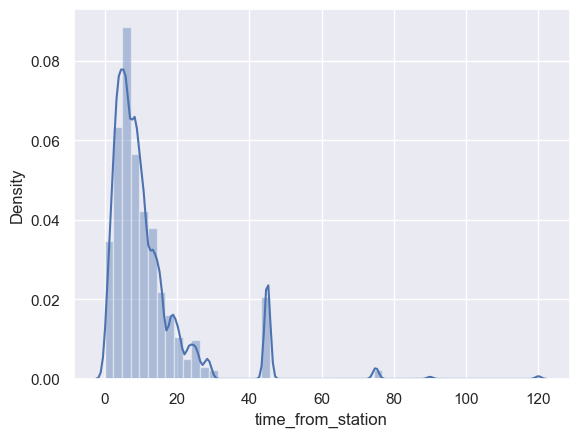

In [31]:
##それぞれのデータの確率密度関数を表示して分布を見る

sns.distplot(df_train_apartment_1['time_from_station'])

##対数正規分布っぽい時は、対数を取ると良い　今回は対数を取らないで分析する

/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_17221/3203933411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_apartment_1['year of construction'])


<Axes: xlabel='year of construction', ylabel='Density'>

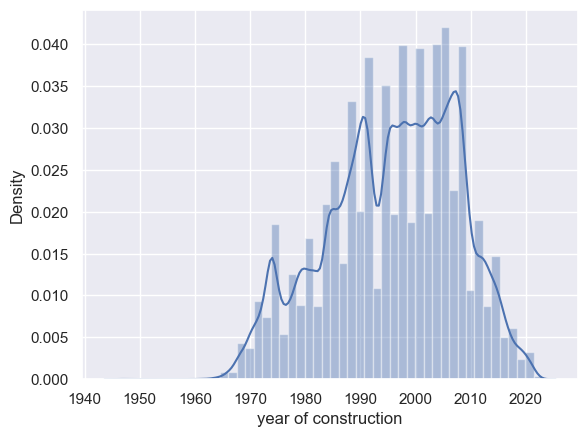

In [32]:
sns.distplot(df_train_apartment_1['year of construction'])

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


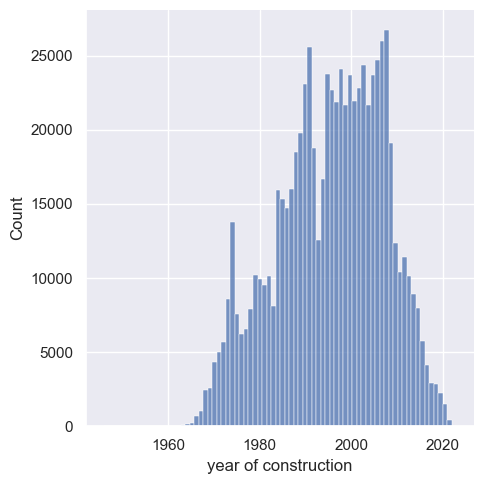

In [33]:
sns.displot(df_train_apartment_1['year of construction'],bins=78)

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


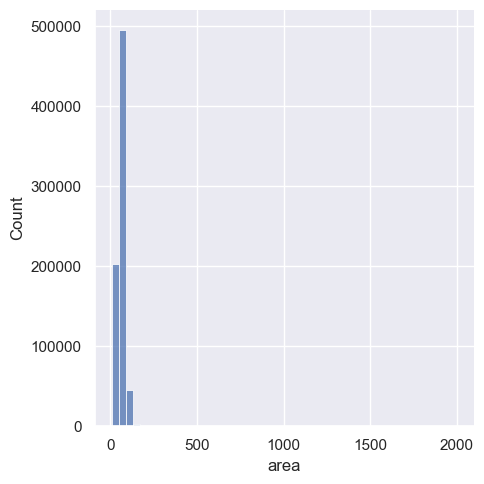

In [34]:
sns.displot(df_train_apartment_1['area'],bins=50)

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12410 (\N{HIRAGANA LETTER PE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from c

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12410 (\N{HIRAGANA LETTER PE}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/py

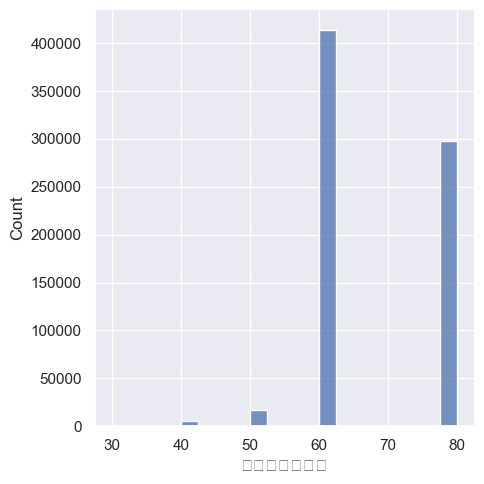

In [35]:
sns.displot(df_train_apartment_1['建ぺい率（％）'],bins=20)

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) m

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/ana

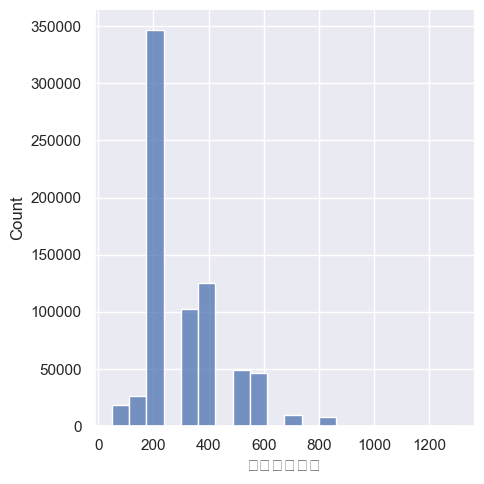

In [36]:
sns.displot(df_train_apartment_1['容積率（％）'],bins=20)

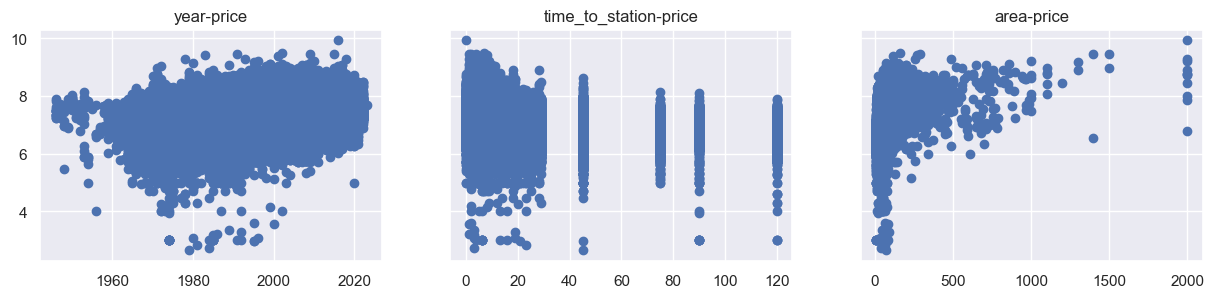

In [37]:
##散布図を書く
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(df_train_apartment_1['year of construction'],df_train_apartment_1['price_log'])
ax1.set_title('year-price')
ax2.scatter(df_train_apartment_1['time_from_station'],df_train_apartment_1['price_log'])
ax2.set_title('time_to_station-price')
ax3.scatter(df_train_apartment_1['area'],df_train_apartment_1['price_log'])
ax3.set_title('area-price')

plt.show()

##見た感じ左から正、負、正の相関が若干ありそう

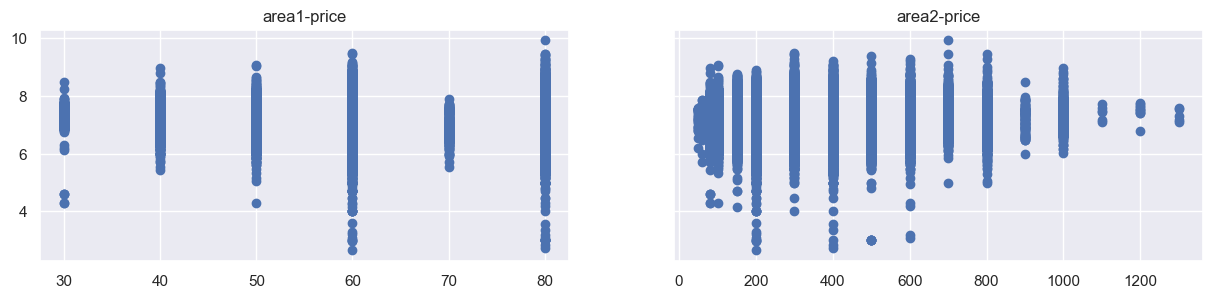

In [38]:
f,(ax4,ax5)=plt.subplots(1,2,sharey=True,figsize=(15,3))
ax4.scatter(df_train_apartment_1['建ぺい率（％）'],df_train_apartment_1['price_log'])
ax4.set_title('area1-price')
ax5.scatter(df_train_apartment_1['容積率（％）'],df_train_apartment_1['price_log'])
ax5.set_title('area2-price')
plt.show()

##相関はなさそう

#流れとしては散布図を書いてなんとなくの相関を見てudemyを見る、その後ダミー変数を作り、そのダミー変数をグルーピングした後実際に
#multiple linear regressionをする

#ダミー変数を取得するもの　
地区→47都道府県では流石に多すぎるので、東北地方などいくつかまとめてグルーピングする
間取り→Sをどうにかして減らしたい



In [39]:
##間取りの要素とそれぞれどのくらいか
elements_count=df_train_apartment_1['間取り'].value_counts()

In [40]:
##Series objectに条件をのせる場合は後ろにただ[]をつけるだけで良い
delete_elements=elements_count[elements_count==1].index
df_train_apartment_1=df_train_apartment_1[~df_train_apartment_1['間取り'].isin(delete_elements)]
df_train_apartment_1['間取り'].value_counts()

##間取りのダミー変数に関してが保留　サービスルームに関しては無印と同じ枠にしてもいいかもしれない

間取り
３ＬＤＫ       315135
１Ｋ         113516
２ＬＤＫ       109538
４ＬＤＫ        66093
１ＬＤＫ        33598
２ＤＫ         22943
１ＤＫ         21445
３ＤＫ         12675
１Ｒ           7594
オープンフロア      5572
２ＬＤＫ＋Ｓ       4371
４ＤＫ          1840
２Ｋ           1396
１ＬＤＫ＋Ｓ       1340
３ＬＤＫ＋Ｓ       1051
５ＬＤＫ          910
３Ｋ            512
２ＤＫ＋Ｓ         472
４ＬＤＫ＋Ｓ        181
４Ｋ            160
３ＬＫ           109
５ＤＫ           107
１ＤＫ＋Ｓ          94
スタジオ           84
３ＤＫ＋Ｓ          77
６ＬＤＫ           36
メゾネット          36
５ＬＤＫ＋Ｓ         34
１Ｋ＋Ｓ           24
４ＤＫ＋Ｓ          24
２ＬＫ            22
１Ｒ＋Ｓ           19
１ＬＫ            15
２Ｋ＋Ｓ           11
２ＬＤ＋Ｓ          11
３ＬＤ             9
３ＬＤＫ＋Ｋ          9
１Ｌ              9
４Ｌ＋Ｋ            7
２ＬＫ＋Ｓ           6
６ＤＫ             5
３ＬＤ＋Ｓ           5
７ＬＤＫ            5
５Ｋ              4
１ＬＤ＋Ｓ           4
２Ｌ              3
６ＬＤＫ＋Ｓ          3
２ＬＤＫ＋Ｋ          3
４ＬＤＫ＋Ｋ          3
３Ｋ＋Ｓ            3
３Ｄ              2
１Ｌ＋Ｓ            2
２Ｌ＋Ｓ            2
８ＬＤＫ            2
７ＬＤＫ＋Ｓ          2
Name: 

In [41]:
df_train_apartment_1['建物の構造'].value_counts()
##RC、ブロック造以下は決してダミー変数にする

建物の構造
ＲＣ            512872
ＳＲＣ           214092
鉄骨造             4780
ＳＲＣ、ＲＣ           849
ＲＣ、鉄骨造           406
ＳＲＣ、鉄骨造          177
木造                94
軽量鉄骨造             23
ブロック造             21
ＲＣ、ブロック造           3
ＳＲＣ、ＲＣ、鉄骨造         3
ＲＣ、軽量鉄骨造           1
ＲＣ、木造              1
Name: count, dtype: int64

In [42]:
##改装の有無に関するダミー変数の設定
conversion_columns=pd.get_dummies(df_train_apartment['改装'])
conversion_columns.drop('未改装',axis=1,inplace=True)
conversion_columns.head(10)

,改装済
0,False
1,False
2,False
3,True
4,False
5,False
6,True
7,False
8,False
9,True


In [43]:
prefecture_columns=pd.get_dummies(df_train_apartment_1['都道府県名'],drop_first=True)
prefecture_columns.head(10)
##drop_firstで三重県が削ぎ落とされている

,京都府,佐賀県,兵庫県,北海道,千葉県,和歌山県,埼玉県,大分県,大阪府,奈良県,宮城県,宮崎県,富山県,山口県,山形県,...,神奈川県,福井県,福岡県,福島県,秋田県,群馬県,茨城県,長崎県,長野県,青森県,静岡県,香川県,高知県,鳥取県,鹿児島県
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
prefecture_columns.loc[:,['北海道','青森県','秋田県','岩手県','宮城県','山形県','福島県']]

,北海道,青森県,秋田県,岩手県,宮城県,山形県,福島県
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2275,False,False,False,False,False,False,False
2279,False,False,False,False,False,False,False
2280,False,False,False,False,False,False,False
2281,False,False,False,False,False,False,False


In [45]:
prefecture_columns.loc[:,['北海道','青森県','秋田県','岩手県','宮城県','山形県','福島県']].max(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
2275    False
2279    False
2280    False
2281    False
2284    False
Length: 747584, dtype: bool

In [46]:
Hokkaido_Tohoku=prefecture_columns.loc[:,['北海道','青森県','秋田県','岩手県','宮城県','山形県','福島県']].max(axis=1).reset_index().drop('index',axis=1)
Kanto=prefecture_columns.loc[:,['茨城県','千葉県','栃木県','埼玉県','群馬県','東京都','神奈川県']].max(axis=1).reset_index().drop('index',axis=1)
Chubu=prefecture_columns.loc[:,['愛知県','静岡県','岐阜県','新潟県','長野県','山梨県','石川県','富山県']].max(axis=1).reset_index().drop('index',axis=1)
Kinki=prefecture_columns.loc[:,['滋賀県','京都府','大阪府','兵庫県','奈良県','和歌山県']].max(axis=1).reset_index().drop('index',axis=1)
Chugoku=prefecture_columns.loc[:,['鳥取県','島根県','岡山県','広島県','山口県']].max(axis=1).reset_index().drop('index',axis=1)
Sikoku=prefecture_columns.loc[:,['香川県','高知県','愛媛県','徳島県']].max(axis=1).reset_index().drop('index',axis=1)
Kyusyu=prefecture_columns.loc[:,['福岡県','大分県','佐賀県','熊本県','宮崎県','鹿児島県','長崎県','沖縄県']].max(axis=1).reset_index().drop('index',axis=1)

In [47]:
df_region=pd.concat([Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu],axis=1)
df_region.columns=['Hokkaido_Tohoku','Kanto','Chubu','Kinki','Chugoku','Sikoku','Kyusyu']
df_region=df_region.reset_index().drop('index',axis=1)
df_region

,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
747579,False,False,False,False,False,False,True
747580,False,False,False,False,False,False,True
747581,False,False,False,False,False,False,True
747582,False,False,False,False,False,False,True


In [48]:
df_train_apartment_1=df_train_apartment_1.reset_index().drop('index',axis=1)
df_train_apartment_1

,都道府県名,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,price_log
0,北海道,13,1988,３ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.079181
1,北海道,13,1994,４ＬＤＫ,100,ＲＣ,60.0,200.0,未改装,7.255273
2,北海道,2,2001,２ＬＤＫ,60,ＲＣ,80.0,300.0,未改装,7.146128
3,北海道,5,1994,３ＬＤＫ,70,ＲＣ,60.0,200.0,改装済,7.301030
4,北海道,45,1990,４ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,7.380211
...,...,...,...,...,...,...,...,...,...,...
747579,沖縄県,10,1988,オープンフロア,40,ＳＲＣ,60.0,200.0,未改装,6.579784
747580,沖縄県,8,1998,４ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.278754
747581,沖縄県,22,2007,４ＬＤＫ,100,ＲＣ,50.0,150.0,未改装,7.681241
747582,沖縄県,6,2013,１ＬＤＫ,90,ＲＣ,80.0,400.0,未改装,7.792392


In [49]:
df_train_apartment_12=pd.concat([df_train_apartment_1,df_region],axis=1)
df_train_apartment_12=df_train_apartment_12.drop('都道府県名',axis=1)
df_train_apartment_12

,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu
0,13,1988,３ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.079181,True,False,False,False,False,False,False
1,13,1994,４ＬＤＫ,100,ＲＣ,60.0,200.0,未改装,7.255273,True,False,False,False,False,False,False
2,2,2001,２ＬＤＫ,60,ＲＣ,80.0,300.0,未改装,7.146128,True,False,False,False,False,False,False
3,5,1994,３ＬＤＫ,70,ＲＣ,60.0,200.0,改装済,7.301030,True,False,False,False,False,False,False
4,45,1990,４ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,7.380211,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747579,10,1988,オープンフロア,40,ＳＲＣ,60.0,200.0,未改装,6.579784,False,False,False,False,False,False,True
747580,8,1998,４ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.278754,False,False,False,False,False,False,True
747581,22,2007,４ＬＤＫ,100,ＲＣ,50.0,150.0,未改装,7.681241,False,False,False,False,False,False,True
747582,6,2013,１ＬＤＫ,90,ＲＣ,80.0,400.0,未改装,7.792392,False,False,False,False,False,False,True


In [50]:
df_train_apartment_1['建物の構造'].value_counts()
##RC、ブロック造以下は決してダミー変数にする

建物の構造
ＲＣ            512872
ＳＲＣ           214092
鉄骨造             4780
ＳＲＣ、ＲＣ           849
ＲＣ、鉄骨造           406
ＳＲＣ、鉄骨造          177
木造                94
軽量鉄骨造             23
ブロック造             21
ＲＣ、ブロック造           3
ＳＲＣ、ＲＣ、鉄骨造         3
ＲＣ、軽量鉄骨造           1
ＲＣ、木造              1
Name: count, dtype: int64

In [51]:
df_train_apartment_12=df_train_apartment_12[~df_train_apartment_12['建物の構造'].isin(['ＲＣ、ブロック造','ＳＲＣ、ＲＣ、鉄骨造 ',\
                                                                            'ＲＣ、軽量鉄骨造','ＲＣ、木造'])]
df_train_apartment_12

,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu
0,13,1988,３ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.079181,True,False,False,False,False,False,False
1,13,1994,４ＬＤＫ,100,ＲＣ,60.0,200.0,未改装,7.255273,True,False,False,False,False,False,False
2,2,2001,２ＬＤＫ,60,ＲＣ,80.0,300.0,未改装,7.146128,True,False,False,False,False,False,False
3,5,1994,３ＬＤＫ,70,ＲＣ,60.0,200.0,改装済,7.301030,True,False,False,False,False,False,False
4,45,1990,４ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,7.380211,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747579,10,1988,オープンフロア,40,ＳＲＣ,60.0,200.0,未改装,6.579784,False,False,False,False,False,False,True
747580,8,1998,４ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.278754,False,False,False,False,False,False,True
747581,22,2007,４ＬＤＫ,100,ＲＣ,50.0,150.0,未改装,7.681241,False,False,False,False,False,False,True
747582,6,2013,１ＬＤＫ,90,ＲＣ,80.0,400.0,未改装,7.792392,False,False,False,False,False,False,True


In [52]:
building_columns=pd.get_dummies(df_train_apartment_12['建物の構造'],drop_first=True)
building_columns

,木造,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造
0,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
747579,False,False,False,False,False,True,False,False,False
747580,False,False,False,True,False,False,False,False,False
747581,False,False,False,True,False,False,False,False,False
747582,False,False,False,True,False,False,False,False,False


In [53]:
df_train_apartment_13=pd.concat([df_train_apartment_12,building_columns],axis=1)
df_train_apartment_13.drop(['建物の構造'],axis=1)

,time_from_station,year of construction,間取り,area,建ぺい率（％）,容積率（％）,改装,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造
0,13,1988,３ＬＤＫ,85,60.0,200.0,未改装,7.079181,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,13,1994,４ＬＤＫ,100,60.0,200.0,未改装,7.255273,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2,2001,２ＬＤＫ,60,80.0,300.0,未改装,7.146128,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,5,1994,３ＬＤＫ,70,60.0,200.0,改装済,7.301030,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,45,1990,４ＬＤＫ,75,60.0,200.0,未改装,7.380211,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747579,10,1988,オープンフロア,40,60.0,200.0,未改装,6.579784,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
747580,8,1998,４ＬＤＫ,85,60.0,200.0,未改装,7.278754,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
747581,22,2007,４ＬＤＫ,100,50.0,150.0,未改装,7.681241,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
747582,6,2013,１ＬＤＫ,90,80.0,400.0,未改装,7.792392,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


In [54]:
##改装に関するダミー変数は最終的にデータを加工したdf_train_apartment_13で行ってから
##間取りの数値化に関してどのような方法があるか

In [55]:
##改装の有無に関するダミー変数の設定
conversion_columns=pd.get_dummies(df_train_apartment_13['改装'])
conversion_columns.drop('未改装',axis=1,inplace=True)
conversion_columns

,改装済
0,False
1,False
2,False
3,True
4,False
...,...
747579,False
747580,False
747581,False
747582,False


In [56]:
##Series objectに条件をのせる場合は後ろにただ[]をつけるだけで良い

shape_count=df_train_apartment_13['間取り'].value_counts()

##間取りのダミー変数に関してが保留　サービスルームに関しては無印と同じ枠にしてもいいかもしれない

In [57]:
#要素が10以上の項目だけ抽出する
new_roomshape=df_train_apartment

In [58]:
##replaceで複数の置換を行う場合は、辞書型のメソッドを使う
pd.options.display.max_rows=70
replace_elements={'１ＬＤＫ＋Ｓ':'１ＬＤＫ','２ＬＤＫ＋Ｓ':'２ＬＤＫ','３ＬＤＫ＋Ｓ':'３ＬＤＫ','４ＬＤＫ＋Ｓ':'４ＬＤＫ','５ＬＤＫ＋Ｓ':'５ＬＤＫ','６ＬＤＫ＋Ｓ':'６ＬＤＫ'\
                 ,'１ＤＫ＋Ｓ':'１ＤＫ','２ＤＫ＋Ｓ':'２ＤＫ','３ＤＫ＋Ｓ':'３ＤＫ','４ＤＫ＋Ｓ':'４ＤＫ','５ＤＫ＋Ｓ':'５ＤＫ','１Ｒ＋Ｓ':'１Ｒ'\
                 ,'１Ｋ＋Ｓ':'１Ｋ','２Ｋ＋Ｓ':'２Ｋ','３Ｋ＋Ｓ':'３Ｋ','４Ｋ＋Ｓ':'４Ｋ','５Ｋ＋Ｓ':'５Ｋ'\
                 ,'２ＬＤＫ＋Ｋ':'２ＬＤＫ','３ＬＤＫ＋Ｋ':'３ＬＤＫ','４ＬＤＫ＋Ｋ':'４ＬＤＫ'\
                 ,'２ＬＫ＋Ｓ':'２ＬＫ','３ＬＤ＋Ｓ':'３ＬＤ'}
df_train_apartment_13['間取り']=df_train_apartment_13['間取り'].replace(replace_elements)


In [59]:
new_roomshape=df_train_apartment_13['間取り'].value_counts()

In [60]:
delete_element=new_roomshape[new_roomshape<10].index
df_train_apartment_13=df_train_apartment_13[~df_train_apartment_13['間取り'].isin(delete_element)]
df_train_apartment_13.head(10)

,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造
0,13,1988,３ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.079181,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,13,1994,４ＬＤＫ,100,ＲＣ,60.0,200.0,未改装,7.255273,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2,2001,２ＬＤＫ,60,ＲＣ,80.0,300.0,未改装,7.146128,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,5,1994,３ＬＤＫ,70,ＲＣ,60.0,200.0,改装済,7.301030,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,45,1990,４ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,7.380211,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,23,1999,３ＬＤＫ,110,ＲＣ,NaN,NaN,未改装,7.342423,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,9,1990,２ＬＤＫ,55,ＲＣ,60.0,200.0,改装済,6.995635,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,9,1980,３ＬＤＫ,85,ＲＣ,60.0,200.0,未改装,7.146128,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,3,2000,４ＬＤＫ,100,ＲＣ,80.0,300.0,未改装,7.278754,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,45,1992,２ＬＤＫ,75,ＲＣ,60.0,200.0,改装済,6.690196,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [61]:
df_train_apartment_14=pd.concat([df_train_apartment_13,conversion_columns],axis=1)
df_train_apartment_14.drop('改装',axis=1,inplace=True)

In [62]:
building_structure_columns=pd.get_dummies(df_train_apartment_14['間取り'],drop_first=True)
building_structure_columns

,スタジオ,メゾネット,１ＤＫ,１Ｋ,１ＬＤＫ,１ＬＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤ＋Ｓ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716637,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
716959,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733179,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df_train_apartment_15=pd.concat([df_train_apartment_14,building_structure_columns],axis=1)
df_train_apartment_15.drop(['間取り','建物の構造'],axis=True,inplace=True)
df_train_apartment_15.head(10)

,time_from_station,year of construction,area,建ぺい率（％）,容積率（％）,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,...,２Ｋ,２ＬＤ＋Ｓ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,13.0,1988.0,85.0,60.0,200.0,7.079181,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,13.0,1994.0,100.0,60.0,200.0,7.255273,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2.0,2001.0,60.0,80.0,300.0,7.146128,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,5.0,1994.0,70.0,60.0,200.0,7.301030,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,45.0,1990.0,75.0,60.0,200.0,7.380211,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,23.0,1999.0,110.0,NaN,NaN,7.342423,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6,9.0,1990.0,55.0,60.0,200.0,6.995635,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
7,9.0,1980.0,85.0,60.0,200.0,7.146128,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,3.0,2000.0,100.0,80.0,300.0,7.278754,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,45.0,1992.0,75.0,60.0,200.0,6.690196,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
df_train_apartment_15['建ぺい率（％）'].fillna(df_train_apartment_15['建ぺい率（％）'].mean(),inplace=True)

In [65]:
df_train_apartment_15['容積率（％）'].fillna(df_train_apartment_15['容積率（％）'].mean(),inplace=True)

In [66]:
df_train_apartment_15.head(10)

,time_from_station,year of construction,area,建ぺい率（％）,容積率（％）,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,...,２Ｋ,２ＬＤ＋Ｓ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,13.0,1988.0,85.0,60.000000,200.0000,7.079181,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,13.0,1994.0,100.0,60.000000,200.0000,7.255273,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2.0,2001.0,60.0,80.000000,300.0000,7.146128,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,5.0,1994.0,70.0,60.000000,200.0000,7.301030,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,45.0,1990.0,75.0,60.000000,200.0000,7.380211,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,23.0,1999.0,110.0,67.723845,303.1307,7.342423,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6,9.0,1990.0,55.0,60.000000,200.0000,6.995635,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
7,9.0,1980.0,85.0,60.000000,200.0000,7.146128,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8,3.0,2000.0,100.0,80.000000,300.0000,7.278754,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9,45.0,1992.0,75.0,60.000000,200.0000,6.690196,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df_train_apartment_15['building_age']=2023-df_train_apartment_15['year of construction']
df_train_apartment_15.drop('year of construction',axis=1,inplace=True)
df_train_apartment_15.head(10)

,time_from_station,area,建ぺい率（％）,容積率（％）,price_log,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,鉄骨造,...,２ＬＤ＋Ｓ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,building_age
0,13.0,85.0,60.000000,200.0000,7.079181,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,35.0
1,13.0,100.0,60.000000,200.0000,7.255273,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,29.0
2,2.0,60.0,80.000000,300.0000,7.146128,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,22.0
3,5.0,70.0,60.000000,200.0000,7.301030,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,29.0
4,45.0,75.0,60.000000,200.0000,7.380211,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,33.0
5,23.0,110.0,67.723845,303.1307,7.342423,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,24.0
6,9.0,55.0,60.000000,200.0000,6.995635,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,33.0
7,9.0,85.0,60.000000,200.0000,7.146128,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,43.0
8,3.0,100.0,80.000000,300.0000,7.278754,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,23.0
9,45.0,75.0,60.000000,200.0000,6.690196,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,31.0


In [68]:
df_train_apartment_15['log_price']=df_train_apartment_15['price_log']
df_train_apartment_15.drop('price_log',axis=1,inplace=True)
df_train_apartment_15.head(10)

,time_from_station,area,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,鉄骨造,ＲＣ,...,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,building_age,log_price
0,13.0,85.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False,False,False,False,35.0,7.079181
1,13.0,100.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True,False,False,False,29.0,7.255273
2,2.0,60.0,80.000000,300.0000,True,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False,False,False,False,22.0,7.146128
3,5.0,70.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False,False,False,False,29.0,7.301030
4,45.0,75.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True,False,False,False,33.0,7.380211
5,23.0,110.0,67.723845,303.1307,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False,False,False,False,24.0,7.342423
6,9.0,55.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False,False,False,False,33.0,6.995635
7,9.0,85.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False,False,False,False,43.0,7.146128
8,3.0,100.0,80.000000,300.0000,True,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True,False,False,False,23.0,7.278754
9,45.0,75.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False,False,False,False,31.0,6.690196


In [69]:
##建設の年ではなくて築年数いしたほうが良いのでは？
##建蔽率と容積率を平均値で埋める？

In [70]:
df_train_apartment_15.columns.values

array(['time_from_station', 'area', '建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ',
       '１ＬＤＫ', '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ',
       '３Ｋ', '３ＬＤ', '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ',
       '６ＬＤＫ', 'building_age', 'log_price'], dtype=object)

In [71]:
df_train_apartment_16=df_train_apartment_15[['time_from_station', 'area','building_age','建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ',
       '１ＬＤＫ', '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ',
       '３Ｋ', '３ＬＤ', '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ',
       '６ＬＤＫ','log_price']]
df_train_apartment_16.head(10)

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,鉄骨造,...,２ＬＤ＋Ｓ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,log_price
0,13.0,85.0,35.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.079181
1,13.0,100.0,29.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,7.255273
2,2.0,60.0,22.0,80.000000,300.0000,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7.146128
3,5.0,70.0,29.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.301030
4,45.0,75.0,33.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,7.380211
5,23.0,110.0,24.0,67.723845,303.1307,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.342423
6,9.0,55.0,33.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6.995635
7,9.0,85.0,43.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.146128
8,3.0,100.0,23.0,80.000000,300.0000,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,7.278754
9,45.0,75.0,31.0,60.000000,200.0000,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6.690196


In [72]:
df_train_apartment_15.shape

(747579, 46)

In [73]:
##一旦csvファイルとして出力する

In [74]:
#df_train_apartment_16.to_csv('processed_data.csv',index=False)

In [75]:
df_train_apartment_16.isnull().sum()

time_from_station    47
area                 47
building_age         47
建ぺい率（％）               0
容積率（％）                0
Hokkaido_Tohoku      47
Kanto                47
Chubu                47
Kinki                47
Chugoku              47
Sikoku               47
Kyusyu               47
木造                   47
軽量鉄骨造                47
鉄骨造                  47
ＲＣ                   47
ＲＣ、鉄骨造               47
ＳＲＣ                  47
ＳＲＣ、鉄骨造              47
ＳＲＣ、ＲＣ               47
ＳＲＣ、ＲＣ、鉄骨造           47
改装済                   0
スタジオ                  0
メゾネット                 0
１ＤＫ                   0
１Ｋ                    0
１ＬＤＫ                  0
１ＬＫ                   0
１Ｒ                    0
２ＤＫ                   0
２Ｋ                    0
２ＬＤ＋Ｓ                 0
２ＬＤＫ                  0
２ＬＫ                   0
３ＤＫ                   0
３Ｋ                    0
３ＬＤ                   0
３ＬＤＫ                  0
３ＬＫ                   0
４ＤＫ                   0
４Ｋ                    0
４ＬＤＫ            

In [76]:
df_train_apartment_16=df_train_apartment_16.dropna().copy()

In [77]:
#df_train_apartment_16.to_csv('processed_data.csv',index=False)

In [78]:
df_train_apartment_16.columns.values

array(['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ',
       '１ＬＤＫ', '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ',
       '３Ｋ', '３ＬＤ', '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ',
       '６ＬＤＫ', 'log_price'], dtype=object)